<a href="https://colab.research.google.com/github/issacridhin/Reinforcement_learning/blob/main/2348546_Lab7_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The agent updates its state-value estimates using the Temporal Difference (TD) Learning method.**

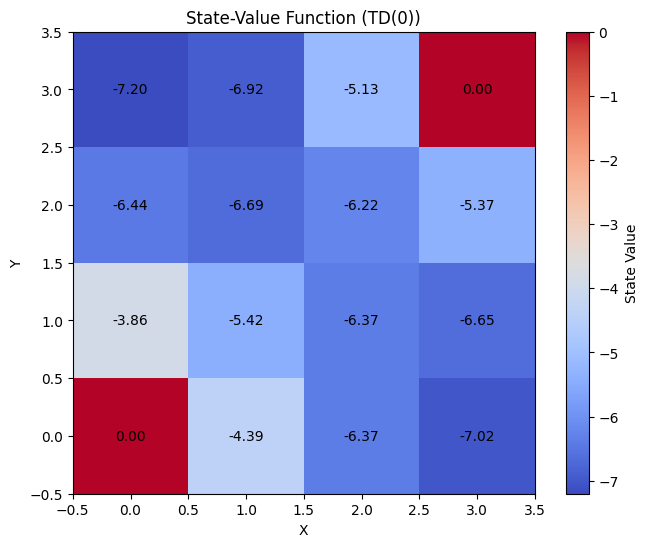

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the GridWorld environment
class GridWorld:
    def __init__(self, size=4, terminal_states=[(0, 0), (3, 3)]):
        self.size = size
        self.terminal_states = terminal_states
        self.reset()

    def reset(self):
        self.agent_position = [self.size - 1, 0]  # Start at bottom-left
        return tuple(self.agent_position)

    def step(self, action):
        # Define possible actions: up, down, left, right
        actions = {"up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)}
        if action in actions:
            new_position = [
                self.agent_position[0] + actions[action][0],
                self.agent_position[1] + actions[action][1],
            ]
            # Ensure new position is within bounds
            self.agent_position = [
                max(0, min(self.size - 1, new_position[0])),
                max(0, min(self.size - 1, new_position[1])),
            ]

        # Check if terminal state
        if tuple(self.agent_position) in self.terminal_states:
            return tuple(self.agent_position), 0, True  # Terminal state, no reward

        return tuple(self.agent_position), -1, False  # Step cost

# TD(0) Implementation
def td_0(grid_world, alpha=0.1, gamma=0.9, episodes=500):
    size = grid_world.size
    state_values = np.zeros((size, size))  # State-value function initialized to 0
    for episode in range(episodes):
        state = grid_world.reset()
        done = False
        while not done:
            # Choose an action randomly
            action = np.random.choice(["up", "down", "left", "right"])
            next_state, reward, done = grid_world.step(action)

            # Update the value of the current state using bootstrapping
            state_values[state] += alpha * (
                reward + gamma * state_values[next_state] - state_values[state]
            )
            state = next_state
    return state_values

# Initialize environment and run TD(0)
grid_world = GridWorld()
state_values = td_0(grid_world)

# Plot the state-value function
plt.figure(figsize=(8, 6))
plt.imshow(state_values, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="State Value")
plt.title("State-Value Function (TD(0))")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
for i in range(grid_world.size):
    for j in range(grid_world.size):
        plt.text(j, i, f"{state_values[i, j]:.2f}", ha="center", va="center", color="black")
plt.show()


#Inference
1. Environment: The agent movies in a 4x4 grid. Terminal states are defined as (0,0) and (3,3).

2. TD(0): The agent updates the state value using:

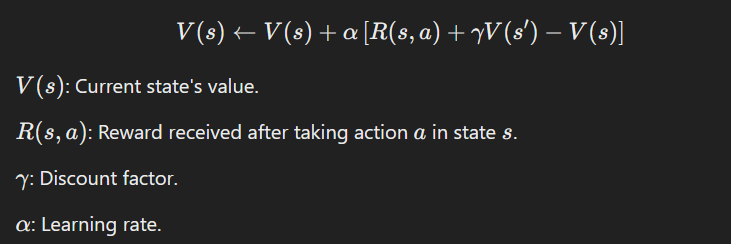

3. Visualization: The heatmap shows the learned state-value function after 500 episodes.